In this notebook, I am going to analyze the data that  discovered the importance of handwashing.A deadly disease( childbed fever) affecting women that just have given birth at the Vienna General Hospital because of the contaminated hands of the doctors delivering the babies.But after handwashing all things have changed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Importing and look at a glance</h3>

In [16]:
yearly=pd.read_csv('E:\work\DataSets\yearly_deaths_by_clinic.csv')

In [6]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [41]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


<h3>Number of deaths in each clinic per year</h3>

In [42]:
display(yearly.groupby(['year','clinic']).agg({'deaths':'sum'}))


deaths
year clinic          
1841 clinic 1     237
     clinic 2      86
1842 clinic 1     518
     clinic 2     202
1843 clinic 1     274
     clinic 2     164
1844 clinic 1     260
     clinic 2      68
1845 clinic 1     241
     clinic 2      66
1846 clinic 1     459
     clinic 2     105

<h3>Number of deaths per year</h3>

Text(0.5, 1.02, 'Number of deaths per year for each clinic')

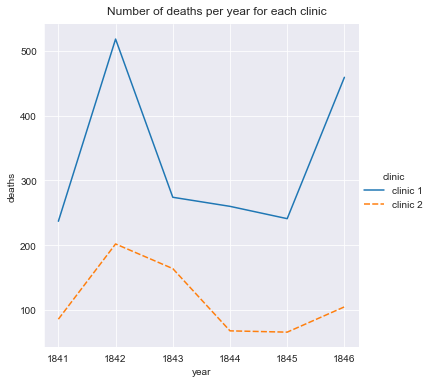

In [52]:
sns.set_style('darkgrid')
g=sns.relplot(x='year',y='deaths',data=yearly,kind='line',hue='clinic',style='clinic')
g.fig.suptitle('Number of deaths per year for each clinic',y=1.02)

The table above shows the number of women giving birth at the two clinics  for the years 1841 to 1846.

<h3>proportion of deaths out of the number of women giving birth</h3>

In [48]:
yearly['proportion_death']=yearly['deaths']/yearly['births']
yearly.head(3)

,year,births,deaths,clinic,proportion_death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542


<h3>proportion of deaths out of the number of women giving birth for clinic 1</h3>

In [50]:
yearly1=yearly[yearly['clinic']=='clinic 1']
yearly1

,year,births,deaths,clinic,proportion_death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


<h3>proportion of deaths out of the number of women giving birth for clinic 2</h3>

In [51]:
yearly2=yearly[yearly['clinic']=='clinic 2']
yearly2

,year,births,deaths,clinic,proportion_death
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


Text(0.5, 1.02, 'proportion of deaths out of the number of women giving birth')

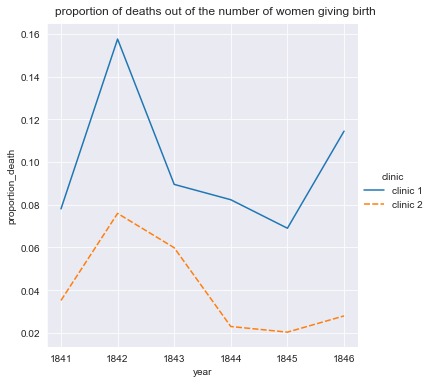

In [54]:
g=sns.relplot(x='year',y='proportion_death',data=yearly,kind='line',hue='clinic',style='clinic')
g.fig.suptitle('proportion of deaths out of the number of women giving birth',y=1.02)

<h3>proportion of deaths per month</h3>

In [55]:
monthly=pd.read_csv('E:\work\DataSets\monthly_deaths.csv')

In [57]:
monthly['proportion_death']=monthly['deaths']/monthly['births']

In [59]:
monthly.head()

,date,births,deaths,proportion_death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Text(0.5, 1.02, 'proportion of deaths per month')

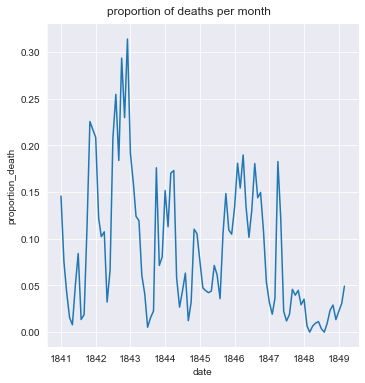

In [69]:
monthly['date']=pd.to_datetime(monthly['date'])

g=sns.relplot(x='date',y='proportion_death',data=monthly,kind='line',ci=False)
g.fig.suptitle('proportion of deaths per month',y=1.02)

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when they made handwashing obligatory.

<h3>The effect of handwashing highlighted</h3>

In [98]:
before=monthly[(monthly['date']>='1841-01-01') & (monthly['date']<='1847-04-01')]
after=monthly[monthly['date']>'1847-03-01']

Text(0.5, 1.02, 'The effect of handwashing')

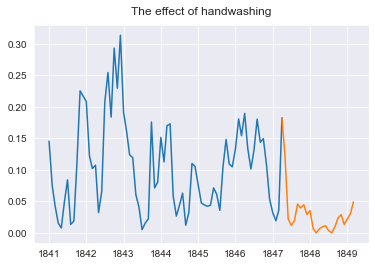

In [101]:
fig,ax=plt.subplots()
ax.plot(before['date'],before['proportion_death'])
ax.plot(after['date'],after['proportion_death'])
ax.set_title('The effect of handwashing',y=1.02)

<h3>More handwashing, fewer deaths?</h3>

Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [106]:
mean_differ=after['proportion_death'].mean()-before['proportion_death'].mean()
mean_differ

-0.07276818183999526

<h3>A Bootstrap analysis</h3>

A bootstrap analysis is a quick way of getting at the uncertainty of an estimate, in this case the estimate is the 'mean_diff'.A bootstrap analysis works by simulating redoing the data collection by drawing randomly from the data and allowing a value to be drawn many times. This process is repeated a large number of times and the distribution of the bootstrapped estimates represents the uncertainty around the original estimate and we can calculate a 95% confidence interval 

In [127]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff=[]
for i in range(3000):
    boot_before=before['proportion_death'].sample(frac=1,replace=True)
    boot_after=after['proportion_death'].sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())


In [128]:
# Calculating a 95% confidence interval from boot_mean_diff
confidence_interval=pd.Series(boot_mean_diff).quantile([0.025,0.957])
confidence_interval

0.025   -0.094854
0.957   -0.052997
dtype: float64

So handwashing reduced the proportion of deaths by between 5.2 and 9 percentage